In [ ]:
#### TO-DOS ###
# Include tPHATE/Phate EMBEDDINGS OF Latent spaces
# Trajectory comparison of specific intervals
# PCA & ICA comparisons if still applicable

In [1]:
### SETUP ###
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import pickle
from torch.utils.data import DataLoader, Dataset
import warnings
warnings.filterwarnings('ignore')

from SCRIPTS.config import *
from SCRIPTS.dataprep import prepare_interval_data
from SCRIPTS.baseline_interval_model import BaselineIntervalModel
from SCRIPTS.baseline_interval_training import train_baseline_interval_model
from SCRIPTS.cross_validation_experiments import run_baseline_interval_cross_validation
from SCRIPTS.comparison_visualization import compare_pointwise_methods, compare_interval_methods

# Visualization setup
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Set random seed
np.random.seed(42)
torch.manual_seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Data path: {COMBINED_SCATTERING}")
print(f"Results path: {BASELINE_RESULTS_DIR}")

Data path: /Users/judesack/Neurospectrum_Creativity/DATA/SCATTERING_COEFFICIENTS/combined_scattering_data.csv
Results path: /Users/judesack/Neurospectrum_Creativity/RESULTS/cross_validation_results/baseline_results


In [2]:
### CONFIGURATION ###

# Run baseline interval cross-validation? T/F
RUN_BASELINE_INTERVAL_CV = True

# Number of CV trials
CV_TRIALS = 5

# Latent dimensions to test
LATENT_DIMS = [8, 48]

# Reconstruction weight
RECON_WEIGHT = 0.3

In [10]:
### BASELINE INTERVAL CROSS-VALIDATION ###

if RUN_BASELINE_INTERVAL_CV:
    print("\n=== BASELINE INTERVAL CROSS-VALIDATION ===")
    
    baseline_interval_results = {}
    
    for latent_dim in LATENT_DIMS:
        print(f"\n--- LATENT DIMENSION: {latent_dim} ---")
        baseline_interval_results[latent_dim] = {}
        
        for split_type in ['subject', 'time']:
            print(f"\n{split_type.upper()} SPLIT:")
            baseline_interval_results[latent_dim][split_type] = run_baseline_interval_cross_validation(
                data_path=COMBINED_SCATTERING,
                split_type=split_type,
                latent_dim=latent_dim,
                num_trials=CV_TRIALS,
                num_epochs=DEFAULT_EPOCHS,
                recon_weight=RECON_WEIGHT
            )
    
    # Save results
    save_path = BASELINE_RESULTS_DIR / 'baseline_interval_cv_results.pkl'
    with open(save_path, 'wb') as f:
        pickle.dump(baseline_interval_results, f)
    print(f"\n✓ Results saved to {save_path}")
    
    # Display summary
    print("\n=== BASELINE INTERVAL SUMMARY ===")
    for latent_dim in LATENT_DIMS:
        print(f"\n{latent_dim}D Latent Space:")
        print(f"  Subject: {baseline_interval_results[latent_dim]['subject']['mean_accuracy']:.1f}% ± {baseline_interval_results[latent_dim]['subject']['std_accuracy']:.1f}%")
        print(f"  Time: {baseline_interval_results[latent_dim]['time']['mean_accuracy']:.1f}% ± {baseline_interval_results[latent_dim]['time']['std_accuracy']:.1f}%")

else:
    # Load existing results
    baseline_file = BASELINE_RESULTS_DIR / 'baseline_interval_cv_results.pkl'
    
    if baseline_file.exists():
        with open(baseline_file, 'rb') as f:
            baseline_interval_results = pickle.load(f)
        print("✓ Loaded existing baseline interval results")
    else:
        print("No baseline interval results found. Run cross-validation first.")
        baseline_interval_results = None


=== BASELINE INTERVAL CROSS-VALIDATION ===

--- LATENT DIMENSION: 8 ---

SUBJECT SPLIT:

=== Baseline Interval Trial 1/5 (subject split, 8D) ===
Found 17 valid subjects

Total intervals extracted: 306 (expected: 306)

Subject split:
  Train subjects (14): ['15053001sub1', '16100801', '14091102', '14091701', '15080601', '14092201', '15053001sub2', '16101401', '14101601', '15040901', '15012001', '16102002', '16100101', '16100601']
  Test subjects (3): ['15081202sub2', '15052902', '15111101']

Split results:
  Train: 252 intervals
  Test: 54 intervals
Epoch [1/100]
  Train - Loss: 1.0393, Acc: 50.00%, Recon: 0.9253, Class: 1.0881
  Val   - Loss: 0.9282, Acc: 55.56%, Recon: 0.4660, Class: 1.1263
Epoch [11/100]
  Train - Loss: 0.5700, Acc: 70.63%, Recon: 0.3807, Class: 0.6511
  Val   - Loss: 0.9689, Acc: 53.70%, Recon: 0.3239, Class: 1.2453
Epoch [21/100]
  Train - Loss: 0.4216, Acc: 86.90%, Recon: 0.3405, Class: 0.4564
  Val   - Loss: 2.5382, Acc: 51.85%, Recon: 0.2442, Class: 3.5213
Epoc


=== CREATING POINT-WISE METHOD COMPARISON ===


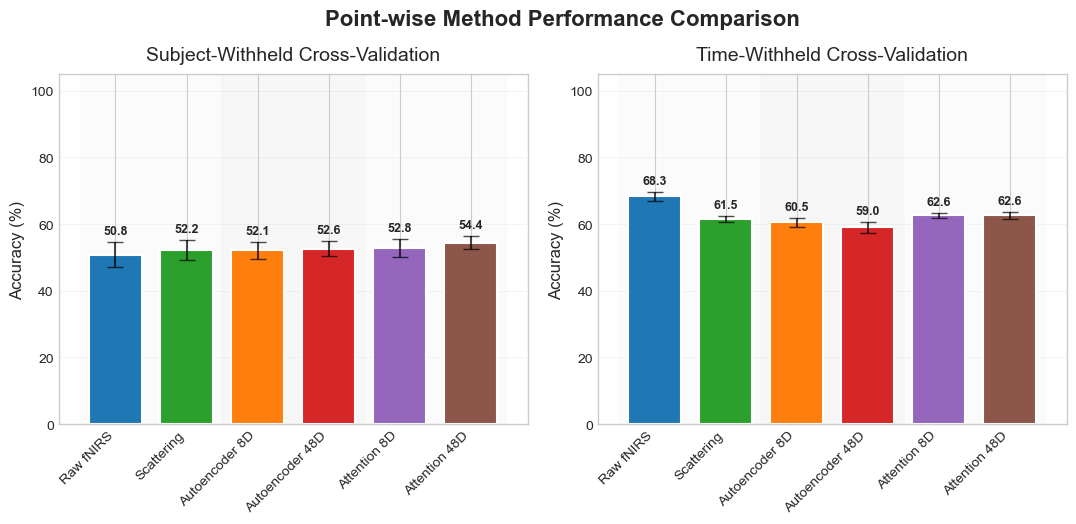

Point-wise comparison saved to: /Users/judesack/Neurospectrum_Creativity/RESULTS/final_visualization_results/method_comparisons/pointwise_comparison.png


In [3]:
### VISUALIZATION: POINT-WISE METHODS ###

print("\n=== CREATING POINT-WISE METHOD COMPARISON ===")
pointwise_results = compare_pointwise_methods()


=== CREATING INTERVAL-BASED METHOD COMPARISON ===


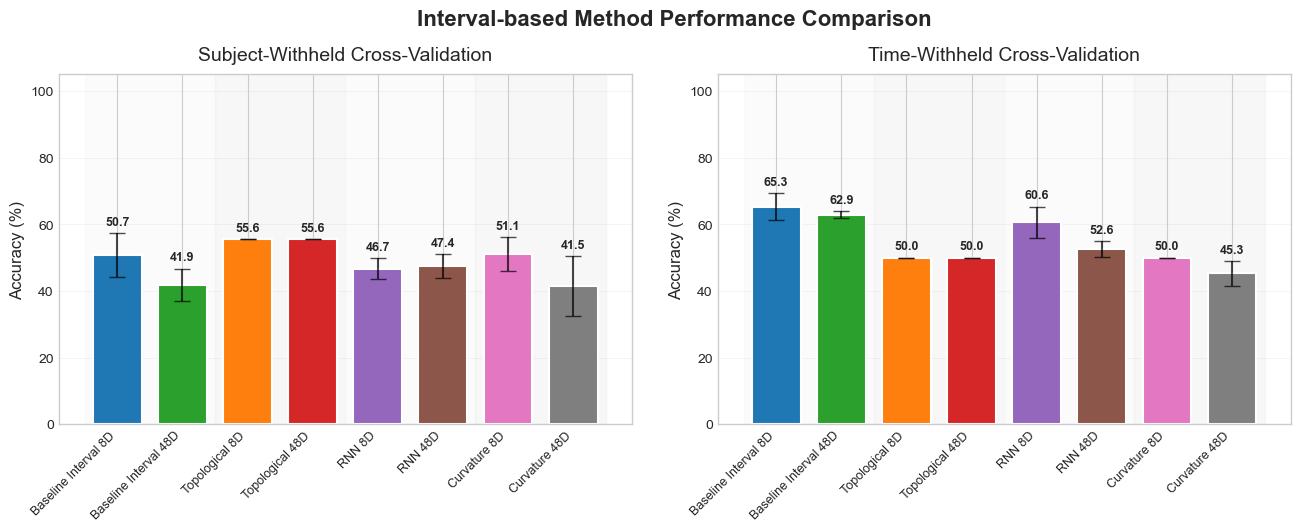

Interval comparison saved to: /Users/judesack/Neurospectrum_Creativity/RESULTS/final_visualization_results/method_comparisons/interval_comparison.png


In [9]:
### VISUALIZATION: INTERVAL-BASED METHODS ###

print("\n=== CREATING INTERVAL-BASED METHOD COMPARISON ===")
interval_results = compare_interval_methods()